Try To Do A Stock Prediction

In [55]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
gpu = ('cuda:0')

In [56]:
# the dataset
dataset = pd.read_csv('sbux.csv')
data = dataset.iloc[:,:2]
data.head()

,date,open
0,2013-02-08,27.920
1,2013-02-11,28.260
2,2013-02-12,28.000
3,2013-02-13,28.230
4,2013-02-14,27.765


In [57]:
data.tail()

,date,open
1254,2018-02-01,56.280
1255,2018-02-02,55.900
1256,2018-02-05,55.530
1257,2018-02-06,53.685
1258,2018-02-07,55.080


In [58]:
#check and fill missing columns
print(data.isnull().sum())

date    0
open    0
dtype: int64


In [59]:
# nan_values = np.where(data.isnull())
# data.iloc[2913:2914,:]

In [60]:
# data['Open'].fillna(method='bfill', inplace=True)
# print(data.isnull().sum())

In [61]:
# nan_values = np.where(data.isnull())
# data.iloc[2912:2915,:]

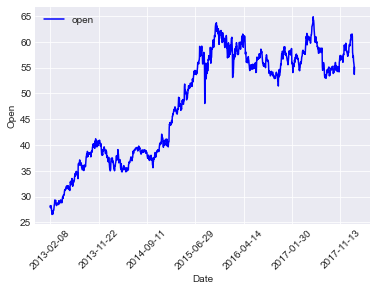

In [63]:
data.plot(kind='line',x='date',y='open',color='blue')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Open')
plt.legend()

In [64]:
open_ = np.array(data.iloc[:,1:])
data_ = np.reshape(open_, -1)
# print(data_)

In [65]:
T = 10
X = []
Y = []
for t in range(len(data_) - T):
    x = data_[t:t+T]
    X.append(x)
    y = data_[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)

In [66]:
# # test ann
# model = nn.Sequential(
#     nn.Linear(10, 100), 
#     nn.ReLU(), 
#     nn.Linear(100, 100), 
#     nn.ReLU(),
#     nn.Linear(100, 100), 
#     nn.ReLU(), 
#     nn.Linear(100, 100), 
#     nn.ReLU(), 
#     nn.Linear(100, 1)
#     )

# print(model)

In [67]:
model = nn.Linear(T, 1)
print(model)
# model = model.to(gpu)

Linear(in_features=10, out_features=1, bias=True)


In [68]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [69]:
X_train = torch.from_numpy(X[:int(N*0.5)].astype(np.float32))
Y_train = torch.from_numpy(Y[:int(N*0.5)].astype(np.float32))
X_test = torch.from_numpy(X[int(N*0.5):].astype(np.float32))
Y_test = torch.from_numpy(Y[int(N*0.5):].astype(np.float32))

In [70]:
loss_history = []
val_loss_history = []

for epoch in range(200): 
    t0 = time.time()
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    loss_history.append(loss)

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, Y_test)
        val_loss = val_loss.item()
        val_loss_history.append(val_loss)

    print('----------------------------------------------------------------')
    print('epoch: ', (epoch + 1))   
    print('----------------------------------------------------------------')
    print('training loss: {:.4f}'.format(loss))
    print('validation loss: {:.4f}'.format(val_loss))
    print('epoch time: {:.4f} seconds'.format(time.time() - t0))

onds
----------------------------------------------------------------
epoch:  108
----------------------------------------------------------------
training loss: 0.8630
validation loss: 2.2885
epoch time: 0.0020 seconds
----------------------------------------------------------------
epoch:  109
----------------------------------------------------------------
training loss: 0.8565
validation loss: 2.3627
epoch time: 0.0020 seconds
----------------------------------------------------------------
epoch:  110
----------------------------------------------------------------
training loss: 0.8473
validation loss: 2.4627
epoch time: 0.0020 seconds
----------------------------------------------------------------
epoch:  111
----------------------------------------------------------------
training loss: 0.8512
validation loss: 2.5059
epoch time: 0.0020 seconds
----------------------------------------------------------------
epoch:  112
----------------------------------------------------------

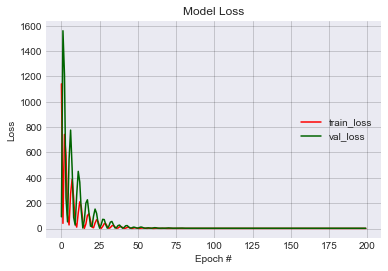

In [71]:
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(loss_history, color = 'red')
plt.plot(val_loss_history, color = 'darkgreen')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'val_loss'], loc = 'center right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)

In [72]:
# one step forcast
test_pred = []

for i in range(len(Y_test)):
    input_ = X_test[i].view(1, -1)
    pred = model(input_).item()
    test_pred.append(pred)

looks good, but wrong


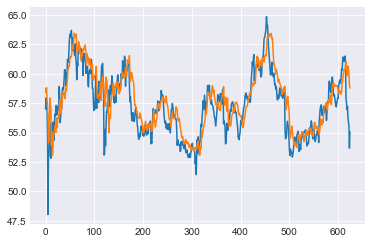

In [73]:
plt.plot(Y_test, label = 'forcast target')
plt.plot(test_pred, label = 'forcast prediction')
print("looks good, but wrong")

In [74]:
# multi step forcast
test_pred = []
X_last_test = X_test[int(N*0.5)]

for i in range(len(Y_test)):
    input_ = X_last_test.view(1, -1)
    pred = model(input_)
    test_pred.append(pred.item())
    X_last_test = torch.cat((X_last_test[1:], pred[0]))

the correct one, not really good, but the correct one


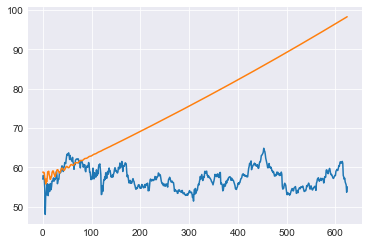

In [75]:
plt.plot(Y_test, label = 'forcast target')
plt.plot(test_pred, label = 'forcast prediction')
print('the correct one, not really good, but the correct one')

Conclusion: it's a difficult problem yet unconventional one to predict stock prices, usually when people do in stock prediction is actually to predict the STOCK RETURN. Let's do that using different algorithm, RNN.

In [76]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [82]:
dataset['Prevclose'] = dataset['close'].shift(1)
dataset.head()

,date,open,high,low,close,volume,Name,Prevclose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [83]:
dataset['Return'] = (dataset['close'] - dataset['Prevclose']) / dataset['Prevclose']
dataset.head()

,date,open,high,low,close,volume,Name,Prevclose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


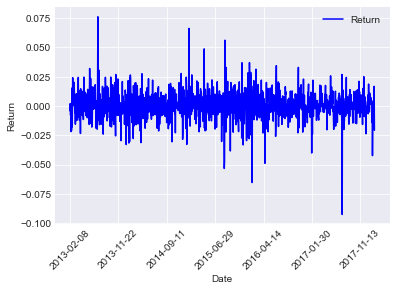

In [84]:
dataset.plot(kind='line', x='date', y='Return', color='blue')
plt.xlabel('Date')
plt.xticks(rotation=45) 
plt.ylabel('Return')
plt.legend()

<AxesSubplot:>

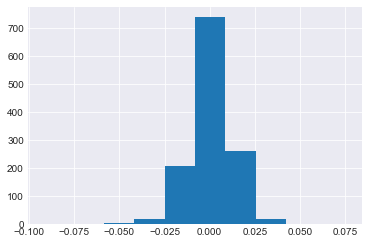

In [85]:
dataset['Return'].hist()

In [86]:
data_ = np.array(dataset.iloc[1:,8:])
# data_ = np.reshape(return_, (-1, 1)) # for scaling with StandardScaler (need 2 dims)
# print(data_)

In [87]:
scaler = StandardScaler()
scaler.fit(data_[:int(len(data_)*0.5)])
data_ = scaler.transform(data_)
data_ = np.reshape(data_, -1) # reshape again so it is in 1 dim
print(data_.shape)

(1258,)


(array([  1.,   1.,   4.,  20., 209., 739., 262.,  18.,   2.,   2.]),
 array([-7.8095773 , -6.40322439, -4.99687149, -3.59051858, -2.18416568,
        -0.77781277,  0.62854014,  2.03489304,  3.44124595,  4.84759885,
         6.25395176]),
 <BarContainer object of 10 artists>)

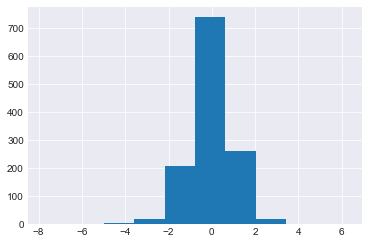

In [88]:
plt.hist(data_)

In [89]:
T = 20
X = []
Y = []
for t in range(len(data_) - T):
    x = data_[t:t+T]
    X.append(x)
    y = data_[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)
N = len(X)

In [90]:
# simple rnn
class SimpleRNN(nn.Module):
    def __init__(self, n_inputs, n_layers, n_hiddens, n_outputs):
        super(SimpleRNN, self).__init__()
        self.D = n_inputs
        self.M = n_hiddens
        self.L = n_layers
        self.K = n_outputs
        self.rnn = nn.RNN(
            input_size = self.D,
            hidden_size = self.M,
            num_layers = self.L,
            nonlinearity = 'relu',
            batch_first = True
            )
        self.fc = nn.Linear(self.M, self.K)
    
    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M)#.to(gpu)

        out, _ = self.rnn(X, h0)

        out = self.fc(out[:, -1, :])
        return out

In [91]:
model = SimpleRNN(n_inputs=1, n_hiddens=5, n_layers=1, n_outputs=1)
print(model)
# model = model.to(gpu)

SimpleRNN(
  (rnn): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)


In [92]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [93]:
X_train = torch.from_numpy(X[:int(N*0.5)].astype(np.float32))
Y_train = torch.from_numpy(Y[:int(N*0.5)].astype(np.float32))
X_test = torch.from_numpy(X[int(N*0.5):].astype(np.float32))
Y_test = torch.from_numpy(Y[int(N*0.5):].astype(np.float32))

In [94]:
loss_history = []
val_loss_history = []

for epoch in range(200): 
    t0 = time.time()
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    optimizer.zero_grad()
    loss.backward()
    # torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=1)
    optimizer.step()

    loss = loss.item()
    loss_history.append(loss)

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, Y_test)
        val_loss = val_loss.item()
        val_loss_history.append(val_loss)

    print('----------------------------------------------------------------')
    print('epoch: ', (epoch + 1))   
    print('----------------------------------------------------------------')
    print('training loss: {:.4f}'.format(loss))
    print('validation loss: {:.4f}'.format(val_loss))
    print('epoch time: {:.4f} seconds'.format(time.time() - t0))

onds
----------------------------------------------------------------
epoch:  108
----------------------------------------------------------------
training loss: 1.0218
validation loss: 1.4185
epoch time: 0.0070 seconds
----------------------------------------------------------------
epoch:  109
----------------------------------------------------------------
training loss: 1.0218
validation loss: 1.4164
epoch time: 0.0110 seconds
----------------------------------------------------------------
epoch:  110
----------------------------------------------------------------
training loss: 1.0218
validation loss: 1.4140
epoch time: 0.0120 seconds
----------------------------------------------------------------
epoch:  111
----------------------------------------------------------------
training loss: 1.0218
validation loss: 1.4130
epoch time: 0.0080 seconds
----------------------------------------------------------------
epoch:  112
----------------------------------------------------------

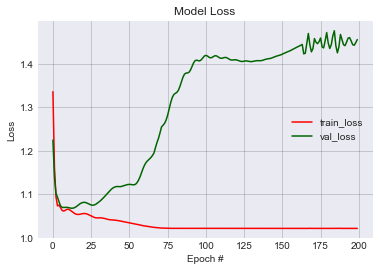

In [95]:
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(loss_history, color = 'red')
plt.plot(val_loss_history, color = 'darkgreen')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'val_loss'], loc = 'center right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)

In [96]:
# one step forcast
test_pred = []
X_ = torch.from_numpy(X.astype(np.float32))
for i in range(len(Y)):
    input_ = X_[i].view(1, -1, 1)
    pred = model(input_).item()
    test_pred.append(pred)

looks quiet good, but wrong


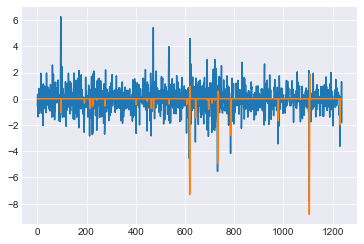

In [97]:
plt.plot(Y, label = 'forcast target')
plt.plot(test_pred, label = 'forcast prediction')
print("looks quiet good, but wrong")

In [98]:
# multi step forcast
test_pred = []

X_last_test = torch.from_numpy(X.astype(np.float32))
X_last_test = X_train[0]
X_last_test = X_last_test.view(-1)

for i in range(len(Y)):
    input_ = X_last_test.view(1, T, 1)
    pred = model(input_)
    test_pred.append(pred.item())
    X_last_test = torch.cat((X_last_test[1:], pred[0]))

the correct one, not really good, but the correct one


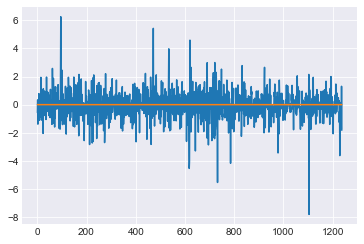

In [99]:
plt.plot(Y, label = 'forcast target')
plt.plot(test_pred, label = 'forcast prediction')
print('the correct one, not really good, but the correct one')

The results shown above still not a good one, let's do that again using more advanced algorithm, LSTM.

In [100]:
class LSTM(nn.Module):
    def __init__(self, n_inputs, n_layers, n_hiddens, n_outputs):
        super(LSTM, self).__init__()
        self.D = n_inputs
        self.M = n_hiddens
        self.L = n_layers
        self.K = n_outputs
        self.lstm = nn.LSTM(
            input_size = self.D,
            hidden_size = self.M,
            num_layers = self.L,
            batch_first = True
            )
        self.fc = nn.Linear(self.M, self.K)
        
    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M)#.to(gpu)
        c0 = torch.zeros(self.L, X.size(0), self.M)#.to(gpu)

        out, _ = self.lstm(X, (h0,c0))

        out = self.fc(out[:, -1, :])
        return out

In [101]:
model = LSTM(n_inputs=1, n_hiddens=7, n_layers=1, n_outputs=1)
print(model)
# model = model.to(gpu)

LSTM(
  (lstm): LSTM(1, 7, batch_first=True)
  (fc): Linear(in_features=7, out_features=1, bias=True)
)


In [102]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [103]:
X_train = torch.from_numpy(X[:int(N*0.5)].astype(np.float32))
Y_train = torch.from_numpy(Y[:int(N*0.5)].astype(np.float32))
X_test = torch.from_numpy(X[int(N*0.5):].astype(np.float32))
Y_test = torch.from_numpy(Y[int(N*0.5):].astype(np.float32))

In [104]:
loss_history = []
val_loss_history = []

for epoch in range(200): 
    t0 = time.time()
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)

    optimizer.zero_grad()
    loss.backward()
    # torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=1)
    optimizer.step()

    loss = loss.item()
    loss_history.append(loss)

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, Y_test)
        val_loss = val_loss.item()
        val_loss_history.append(val_loss)

    print('----------------------------------------------------------------')
    print('epoch: ', (epoch + 1))   
    print('----------------------------------------------------------------')
    print('training loss: {:.4f}'.format(loss))
    print('validation loss: {:.4f}'.format(val_loss))
    print('epoch time: {:.4f} seconds'.format(time.time() - t0))

onds
----------------------------------------------------------------
epoch:  108
----------------------------------------------------------------
training loss: 0.9342
validation loss: 1.2540
epoch time: 0.0489 seconds
----------------------------------------------------------------
epoch:  109
----------------------------------------------------------------
training loss: 0.9305
validation loss: 1.2610
epoch time: 0.0449 seconds
----------------------------------------------------------------
epoch:  110
----------------------------------------------------------------
training loss: 0.9273
validation loss: 1.2671
epoch time: 0.0499 seconds
----------------------------------------------------------------
epoch:  111
----------------------------------------------------------------
training loss: 0.9245
validation loss: 1.2714
epoch time: 0.0568 seconds
----------------------------------------------------------------
epoch:  112
----------------------------------------------------------

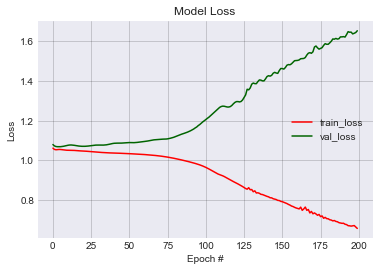

In [105]:
plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(loss_history, color = 'red')
plt.plot(val_loss_history, color = 'darkgreen')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['train_loss', 'val_loss'], loc = 'center right')
plt.grid(axis = 'y', c = 'black', alpha = 0.2)
plt.grid(axis = 'x', c = 'black', alpha = 0.2)

In [106]:
# one step forcast
test_pred = []
X_ = torch.from_numpy(X.astype(np.float32))
for i in range(len(Y)):
    input_ = X_[i].view(1, -1, 1)
    pred = model(input_).item()
    test_pred.append(pred)

looks quiet good, but wrong


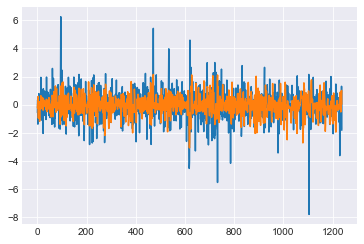

In [107]:
plt.plot(Y, label = 'forcast target')
plt.plot(test_pred, label = 'forcast prediction')
print("looks quiet good, but wrong")

In [108]:
# multi step forcast
test_pred = []

X_last_test = torch.from_numpy(X.astype(np.float32))
X_last_test = X_train[0]
X_last_test = X_last_test.view(-1)

for i in range(len(Y)):
    input_ = X_last_test.view(1, T, 1)
    pred = model(input_)
    test_pred.append(pred.item())
    X_last_test = torch.cat((X_last_test[1:], pred[0]))

the correct one


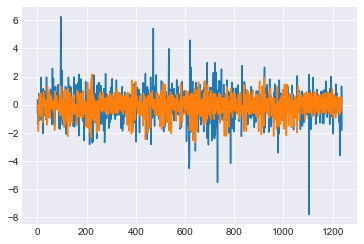

In [109]:
plt.plot(Y, label = 'forcast target')
plt.plot(test_pred, label = 'forcast prediction')
print('the correct one')

The model is clearly overfit, since the validation loss is keep increasing by the number of epoch, but the model was able to capture some pattern in the data, hence in this case the LSTM model works better than the simple vanilla RNN, but still not a good model, it needs more tuning. 